# Parkinson's Disease Dataset Analysis and Machine Learning


---

## Importing the Dependencies

In [47]:
import numpy as np
import pandas as pd 

## Data Collection and Processing

In [48]:
parkinsons_data=pd.read_csv(r"E:/College/Training/NTI/multiple-disease-prediction-streamlit-app-main/dataset/parkinsons_disease_data_test.csv")


In [49]:
parkinsons_data.head()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,...,UPDRS,MoCA,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,85,0,19.619878,0,5.108241,1.380660,0,0,0,0,...,6.458713,29.181289,1,0,0,0,0,0,0,0
1,75,0,16.247339,1,6.027648,8.409804,0,0,0,0,...,37.306703,12.332639,0,1,0,1,0,1,0,1
2,70,1,15.368239,0,2.242135,0.213275,0,0,0,1,...,67.838170,29.927783,1,0,0,0,1,0,1,1
3,52,0,15.454557,0,5.997788,1.375045,0,0,0,0,...,52.964696,21.304268,1,1,1,0,0,0,1,1
4,87,0,18.616042,0,9.775243,1.188607,0,0,0,0,...,21.804880,8.336364,0,0,0,1,0,1,0,0


In [50]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2105 non-null   int64  
 1   Gender                    2105 non-null   int64  
 2   BMI                       2105 non-null   float64
 3   Smoking                   2105 non-null   int64  
 4   AlcoholConsumption        2105 non-null   float64
 5   PhysicalActivity          2105 non-null   float64
 6   FamilyHistoryParkinsons   2105 non-null   int64  
 7   TraumaticBrainInjury      2105 non-null   int64  
 8   Hypertension              2105 non-null   int64  
 9   Diabetes                  2105 non-null   int64  
 10  Depression                2105 non-null   int64  
 11  Stroke                    2105 non-null   int64  
 12  SystolicBP                2105 non-null   int64  
 13  DiastolicBP               2105 non-null   int64  
 14  Choleste

In [51]:
parkinsons_data.describe().style.background_gradient(cmap='plasma')

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,69.601900,0.492637,27.209493,0.296437,10.040413,5.016674,0.145843,0.106413,0.145843,0.148219,0.205226,0.048931,133.719715,90.249881,226.860840,126.147858,59.670352,222.940500,101.415318,15.094314,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477
std,11.594511,0.500065,7.208099,0.456795,5.687014,2.890919,0.353033,0.308439,0.353033,0.355401,0.403962,0.215775,26.502355,17.061488,43.589406,43.407036,23.370920,101.895822,56.591448,8.643014,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631
min,50.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.062698,50.022828,20.027981,50.113604,0.028441,0.021191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,20.782176,0.000000,5.150278,2.455703,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,75.000000,189.385178,88.841960,39.538643,132.520174,53.048148,7.517160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,0.000000,27.184571,0.000000,10.070337,5.031550,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,228.528256,126.884570,59.343357,222.802452,102.561023,14.963574,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,80.000000,1.000000,33.462452,1.000000,14.829565,7.512795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,264.608100,163.912782,79.366628,311.699109,149.831682,22.608362,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,1.000000,39.999887,1.000000,19.988866,9.995255,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.963074,199.985981,99.982265,399.975023,198.953604,29.970107,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
parkinsons_data.isnull().sum()

Age                         0
Gender                      0
BMI                         0
Smoking                     0
AlcoholConsumption          0
PhysicalActivity            0
FamilyHistoryParkinsons     0
TraumaticBrainInjury        0
Hypertension                0
Diabetes                    0
Depression                  0
Stroke                      0
SystolicBP                  0
DiastolicBP                 0
CholesterolTotal            0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
UPDRS                       0
MoCA                        0
Tremor                      0
Rigidity                    0
Bradykinesia                0
PosturalInstability         0
SpeechProblems              0
SleepDisorders              0
Constipation                0
Diagnosis                   0
dtype: int64

In [53]:
parkinsons_data.duplicated().sum()

0

## Exploratory Data Analysis (EDA)


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import plotly.express as px

In [56]:
target_counts = parkinsons_data['Diagnosis'].value_counts()

fig = px.pie(target_counts, 
             values=target_counts.values, 
             names=target_counts.index, 
             color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_traces(textposition='inside', 
                  textinfo='percent+label', 
                  marker=dict(line=dict(color='white', width=2)))

fig.show()


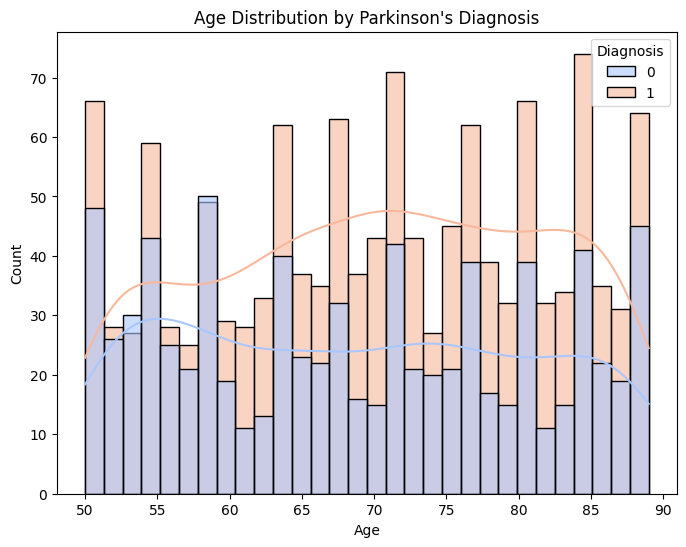

In [57]:
plt.figure(figsize=(8, 6))
sns.histplot(parkinsons_data, x="Age", hue="Diagnosis", kde=True, bins=30, palette="coolwarm", alpha=0.6)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Parkinson's Diagnosis")

plt.show()


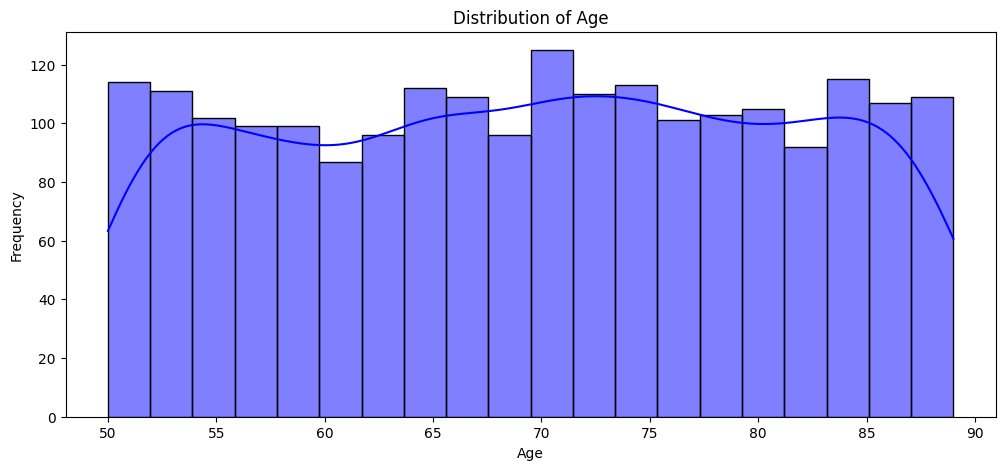

In [58]:
plt.figure(figsize=(12, 5))
sns.histplot(parkinsons_data['Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

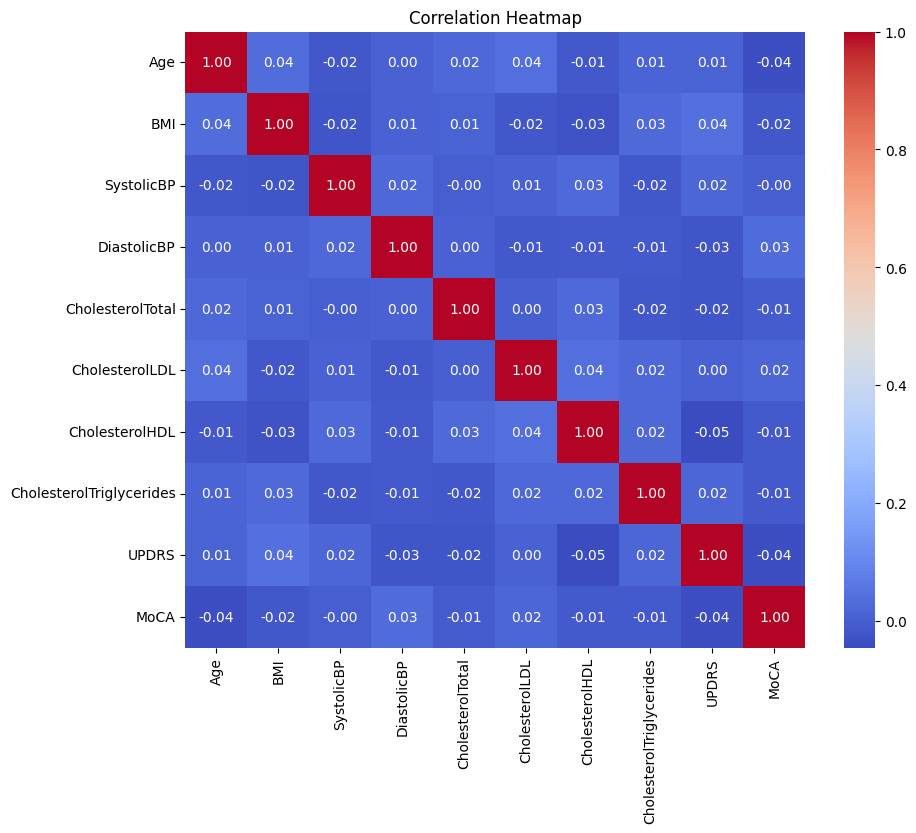

In [59]:
numerical_columns = [
    'Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'UPDRS',
    'MoCA'
]

plt.figure(figsize=(10, 8))
numeric_data = parkinsons_data[numerical_columns]
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Splitting the Features and Target

In [60]:
Features=parkinsons_data.drop(columns='Diagnosis',axis=1)
Target=parkinsons_data['Diagnosis']

In [61]:
Features

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,...,CholesterolTriglycerides,UPDRS,MoCA,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation
0,85,0,19.619878,0,5.108241,1.380660,0,0,0,0,...,337.307114,6.458713,29.181289,1,0,0,0,0,0,0
1,75,0,16.247339,1,6.027648,8.409804,0,0,0,0,...,264.635521,37.306703,12.332639,0,1,0,1,0,1,0
2,70,1,15.368239,0,2.242135,0.213275,0,0,0,1,...,395.662649,67.838170,29.927783,1,0,0,0,1,0,1
3,52,0,15.454557,0,5.997788,1.375045,0,0,0,0,...,362.189688,52.964696,21.304268,1,1,1,0,0,0,1
4,87,0,18.616042,0,9.775243,1.188607,0,0,0,0,...,149.956586,21.804880,8.336364,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2100,87,1,38.483841,0,12.674393,5.325900,0,0,1,0,...,161.291730,187.887925,28.634010,1,0,0,0,1,1,0
2101,67,0,33.694396,1,0.977018,0.108599,1,0,0,0,...,240.086616,172.325253,13.106537,0,0,0,1,0,1,1
2102,65,0,22.829631,0,6.152286,5.775103,1,0,0,1,...,222.231014,111.851581,26.527734,0,0,0,0,1,1,0
2103,61,1,16.871030,1,0.292094,2.280475,0,0,0,0,...,167.980929,144.474453,19.873404,1,0,1,0,0,1,1


In [62]:
Target

0       0
1       1
2       1
3       1
4       0
       ..
2100    0
2101    1
2102    1
2103    1
2104    0
Name: Diagnosis, Length: 2105, dtype: int64

## The model 

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## Splitting the Data into Training data & Test Data

In [64]:
X_train,X_test,y_train,y_test=train_test_split(Features,Target,test_size=0.2,random_state=42)

##  Define Gradient Boosting classifier


In [68]:
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


## Accuracy Score

In [69]:
train_acc = accuracy_score(y_train, y_train_pred) * 100
test_acc = accuracy_score(y_test, y_test_pred) * 100


print(f"Gradient Boosting Train Accuracy: {train_acc:.2f}%")
print(f"Gradient Boosting Test Accuracy: {test_acc:.2f}%")

print(classification_report(y_test, y_test_pred))

Gradient Boosting Train Accuracy: 92.58%
Gradient Boosting Test Accuracy: 84.32%
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       150
           1       0.89      0.86      0.88       271

    accuracy                           0.84       421
   macro avg       0.83      0.84      0.83       421
weighted avg       0.85      0.84      0.84       421



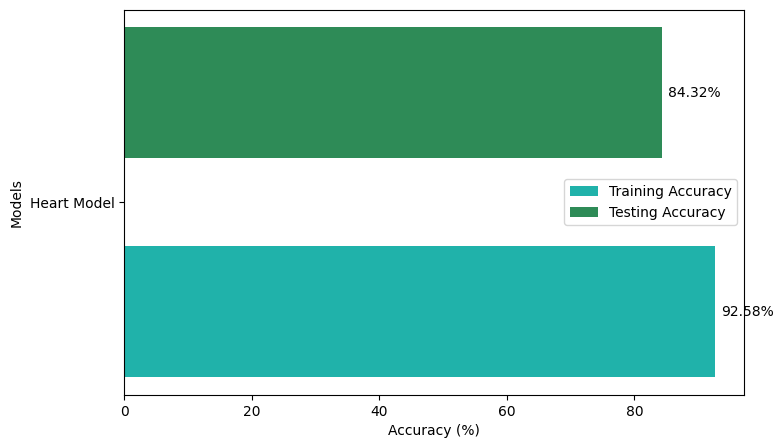

In [ ]:
models = ['Parkinson’s Model']
training_accuracy = [92.58]
testing_accuracy = [84.32]

x = np.arange(len(models))  
width = 0.3  
spacing = 0.2  

fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.barh(x - (width + spacing)/2, training_accuracy, width, label='Training Accuracy', color='lightseagreen')
bars2 = ax.barh(x + (width + spacing)/2, testing_accuracy, width, label='Testing Accuracy', color='seagreen')

ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Models')
ax.set_yticks(x)
ax.set_yticklabels(models)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{bar.get_width()}%', va='center', fontsize=10)

plt.show()


## Test model

In [74]:
input_data = (70,1,15.36823871,0,2.242135331,0.213274591,0,0,0,1,0,0,113,93,287.3879957,118.7025999,85.5883043,395.662649,67.83817038,29.92778257,1,0,0,0,1,0,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')


[1]
The Person has Heart Disease


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names



## Saving the trained model

In [71]:
import pickle

In [72]:
filename = 'parkinsons_data_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [73]:
loaded_model = pickle.load(open('parkinsons_data_model.sav', 'rb'))